In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

sns.set_style("darkgrid")

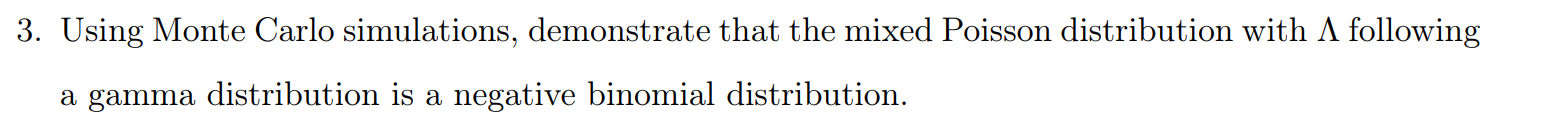

## Mixed Poisson Distribution

A **Mixed Poisson Distribution** extends the standard Poisson distribution by allowing its rate parameter $\lambda$ to be random instead of fixed. This makes it more flexible in modeling count data with extra variability.

### Definition
If $\Lambda$ is a random variable with distribution $G(\lambda)$, and $X$ follows a Poisson distribution with rate $\lambda$ conditional on $\Lambda = \lambda$, then $X$ follows a mixed Poisson distribution. Formally:

$$
    X \mid \Lambda = \lambda \sim \text{Poisson}(\lambda)
$$

The overall probability mass function (PMF) of $X$ is:

$$
    P(X = x) = \int_0^\infty \frac{\lambda^x e^{-\lambda}}{x!} \, dG(\lambda)
$$

where $x = 0, 1, 2, \dots$, and $G(\lambda)$ is the cumulative distribution function (CDF) of $\Lambda$.

### Key Idea
Unlike the standard Poisson distribution, where $\lambda$ is fixed, here $\lambda$ changes according to a distribution. This allows the model to handle overdispersion (variance larger than the mean), which the standard Poisson distribution cannot.

### Examples of Mixing Distributions
1. **Gamma Distribution**: If $\Lambda \sim \text{Gamma}(\alpha, \beta)$, then $X$ follows a **Negative Binomial Distribution**.

2. **Discrete Distributions**: $\Lambda$ can also take discrete values with certain probabilities.

### Applications
Mixed Poisson distributions are useful in:
- **Insurance**: Modeling claim counts with varying claim rates.
- **Epidemiology**: Analyzing outbreaks with different infection rates across regions.
- **Econometrics**: Modeling purchase counts in customer behavior studies.

### Summary
The mixed Poisson distribution allows the rate parameter $\lambda$ to vary, offering a more flexible way to model count data with extra variability, such as overdispersion, that the standard Poisson model cannot handle.


In [184]:
def poisson_culminative_gamma(n, alpha, beta):
    
    lambdas = ss.gamma.rvs(a=alpha, scale = 1/beta, size=n)
    mixed_poisson_rvs = ss.poisson.rvs(mu=lambdas)
    
    return mixed_poisson_rvs


def empirical_cdf(data):

    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    y = np.arange(1, n + 1) / n
    
    return sorted_data, y


In [194]:
mp_hist = []
nb_hist = []
mp_cdf = []
nb_cdf = []
nb_pmf = []

alpha_list = [2, 3, 5]
beta_list = [1/2, 1, 2]

for alpha in alpha_list:
    for beta in beta_list:
        
        r = alpha
        p = beta/(beta + 1)
        
        mp = poisson_culminative_gamma(100000, alpha, beta)
        mp_hist.append(mp)
        mp_cdf.append(empirical_cdf(mp))
        
        nb = ss.nbinom.rvs(n=r, p=p, size=100000)        
        nb_hist.append(nb)
        nb_cdf.append(empirical_cdf(nb))
        nb_pmf.append(ss.nbinom.pmf(k = np.arange(0, int(np.max(mp))), n=r, p=p))


C:\Users\Martyna\AppData\Local\Temp/ipykernel_4928/139414472.py:3: UserWarning: p-value capped: true value larger than 0.25
  print(f'For alpha = {alpha_list[i//3]} and beta = {beta_list[i%3]} p value of KS test is {ss.kstest(mp_hist[i], nb_hist[i]).pvalue} and of Anderson-Darling test {ss.anderson_ksamp([mp_hist[i], nb_hist[i]]).significance_level}')


For alpha = 2 and beta = 0.5 p value of KS test is 0.9197189285883667 and of Anderson-Darling test 0.25


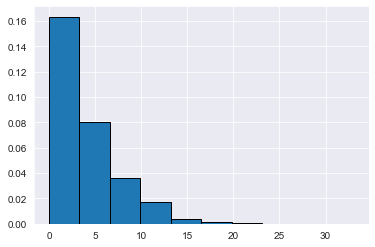

For alpha = 2 and beta = 1 p value of KS test is 0.8612955028464405 and of Anderson-Darling test 0.25


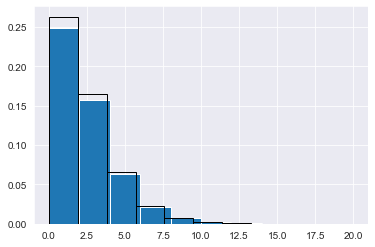

For alpha = 2 and beta = 2 p value of KS test is 1.0 and of Anderson-Darling test 0.25


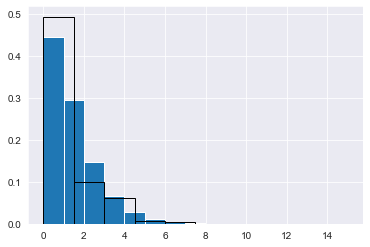

For alpha = 3 and beta = 0.5 p value of KS test is 0.7862984275919007 and of Anderson-Darling test 0.25


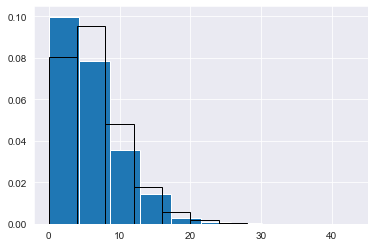

For alpha = 3 and beta = 1 p value of KS test is 0.6387610806917036 and of Anderson-Darling test 0.25


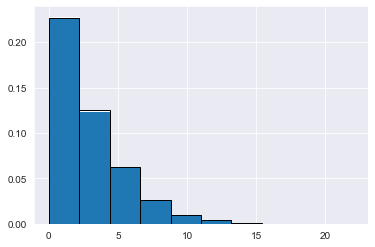

For alpha = 3 and beta = 2 p value of KS test is 0.9264415542415005 and of Anderson-Darling test 0.25


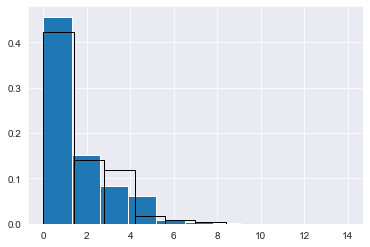

For alpha = 5 and beta = 0.5 p value of KS test is 0.8758877077106136 and of Anderson-Darling test 0.25


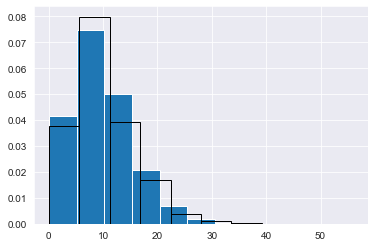

For alpha = 5 and beta = 1 p value of KS test is 0.9657389274494186 and of Anderson-Darling test 0.25


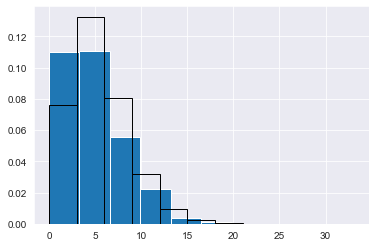

For alpha = 5 and beta = 2 p value of KS test is 0.9518092221720054 and of Anderson-Darling test 0.25


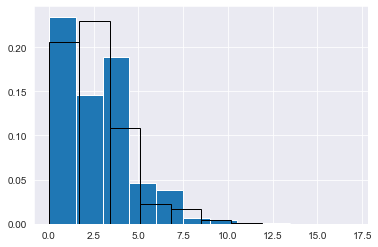

In [186]:
#ks test
for i in range(9):
    print(f'For alpha = {alpha_list[i//3]} and beta = {beta_list[i%3]} p value of KS test is {ss.kstest(mp_hist[i], nb_hist[i]).pvalue} and of Anderson-Darling test {ss.anderson_ksamp([mp_hist[i], nb_hist[i]]).significance_level}')
    plt.hist(mp_hist[i], density=True)
    plt.hist(nb_hist[i], edgecolor='black', facecolor='none', density=True)
    plt.show()

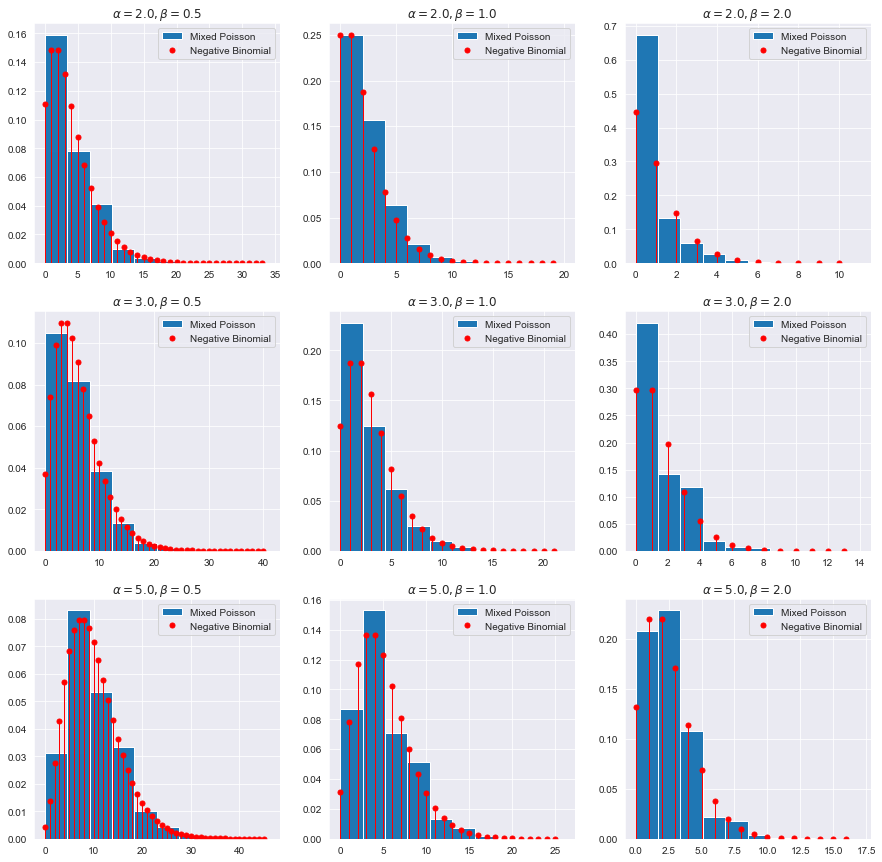

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

i = 0
for r in range(3):
    for c in range(3):
        ax[r,c].hist(mp_hist[i], density=True, label='Mixed Poisson')
        
        x = np.arange(0, int(np.max(mp_hist[i])))
        for j in range(len(nb_pmf[i])):
            ax[r,c].plot([x[j], x[j]], [0, nb_pmf[i][j]], color='red', linewidth=1)
            ax[r,c].plot(x[j], nb_pmf[i][j], 'o', color='red', markersize=5, label='Negative Binomial' if j == 0 else "")
            
        ax[r,c].legend()
        ax[r,c].set_title(r'$\alpha = ' + f'{alpha_list[r]:.1f}' + r', \beta = ' + f'{beta_list[c]:.1f}' + r'$')
        i += 1
        
fig

In [222]:
plt.savefig("Task3_distributions_comparison.svg")

<Figure size 432x288 with 0 Axes>

In [168]:
for i in mp_hist:
    print(f'mean: {np.mean(i)}, var: {np.var(i)}')

mean: 3.996669, var: 11.951465904438997
mean: 2.000532, var: 3.998389716976
mean: 0.996578, var: 1.4920982899159991
mean: 6.006744, var: 18.036412518463994
mean: 2.998871, var: 6.001953725359
mean: 1.498594, var: 2.249160023163999
mean: 9.994531, var: 29.84295509003899
mean: 4.997698, var: 10.004116700795993
mean: 2.503492, var: 3.753019805936


In [169]:
for i in nb_hist:
    print(f'mean: {np.mean(i)}, var: {np.var(i)}')

mean: 4.001774, var: 12.026458852924005
mean: 2.002871, var: 4.001966757359
mean: 0.999505, var: 1.5003567549749999
mean: 6.00358, var: 18.056941183599996
mean: 2.998914, var: 5.996984820603999
mean: 1.499896, var: 2.2447379891840007
mean: 9.996085, var: 30.054771672775
mean: 4.995941, var: 9.978714524519003
mean: 2.500447, var: 3.7521518001910006


In [75]:
mp_hist

[array([1, 3, 1, ..., 5, 3, 0]),
 array([3, 1, 1, ..., 0, 1, 1]),
 array([0, 0, 1, ..., 0, 1, 4]),
 array([ 6,  7, 10, ...,  8,  3,  4]),
 array([3, 9, 1, ..., 0, 1, 2]),
 array([2, 1, 0, ..., 4, 0, 0]),
 array([17,  6, 15, ...,  6, 11, 11]),
 array([7, 8, 6, ..., 7, 7, 5]),
 array([10,  0,  1, ...,  2,  8,  2])]

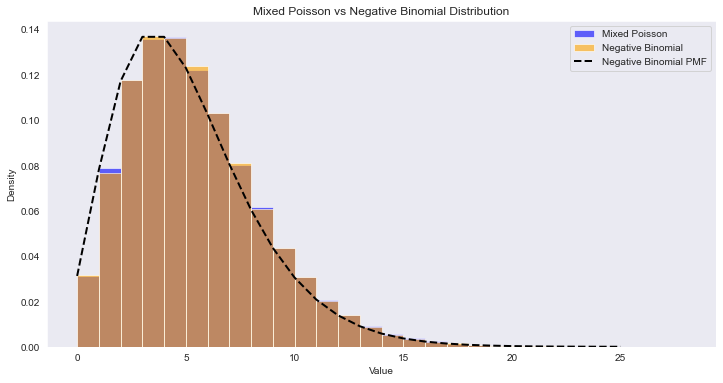

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson, nbinom

# Parameters for the Gamma distribution (shape and rate)
alpha = 5.0  # Shape parameter (same as r in the Negative Binomial)
beta = 1.0   # Rate parameter (inverse scale)

# Number of samples
num_samples = 100000

# Step 1: Generate Lambda values from the Gamma distribution
lambda_samples = gamma.rvs(a=alpha, scale=1/beta, size=num_samples)

# Step 2: Generate Poisson samples with Lambda as the mean
poisson_samples = [poisson.rvs(mu=lam) for lam in lambda_samples]

# Step 3: Compare the distribution to a Negative Binomial
# Parameters for the Negative Binomial distribution
r = alpha
p = beta / (beta + 1)  # Success probability in the Negative Binomial

# Generate Negative Binomial samples
nbinom_samples = nbinom.rvs(n=r, p=p, size=num_samples)

# Plotting the histograms
plt.figure(figsize=(12, 6))

# Histogram of the mixed Poisson samples
plt.hist(poisson_samples, bins=range(0, max(poisson_samples)+1), density=True, alpha=0.6, color='blue', label='Mixed Poisson')

# Histogram of the Negative Binomial samples
plt.hist(nbinom_samples, bins=range(0, max(nbinom_samples)+1), density=True, alpha=0.6, color='orange', label='Negative Binomial')

# Overlay theoretical Negative Binomial PMF
x = np.arange(0, max(poisson_samples)+1)
nbinom_pmf = nbinom.pmf(x, n=r, p=p)
plt.plot(x, nbinom_pmf, 'k--', label='Negative Binomial PMF', linewidth=2)

# Add labels and legend
plt.title('Mixed Poisson vs Negative Binomial Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.show()


In [171]:
ss.kstest(poisson_samples, nbinom_samples).pvalue

0.997725440363972